In [2]:
#сса ---> complete case analysis

#df ---> missing data ---> filter missing data
# new_df = filtered_columns_in_which_we_have_missing_data

#new_df --> missing_data_drop

# Architecture ----> Histogram ---->
# past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture --->
# it means we can drop missing data
# if past data architecture is not overlap to new data architecture --->
# it means we can not drop missing data

In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('dsjob.csv')

In [8]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [16]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [18]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
539,no_enrollment,Graduate,10,2
839,no_enrollment,Graduate,13,2
157,no_enrollment,Masters,12,1
877,no_enrollment,Primary School,2,never
288,Full time course,Graduate,2,never


In [20]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [22]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [28]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [33]:
import matplotlib.pyplot as plt

<Axes: >

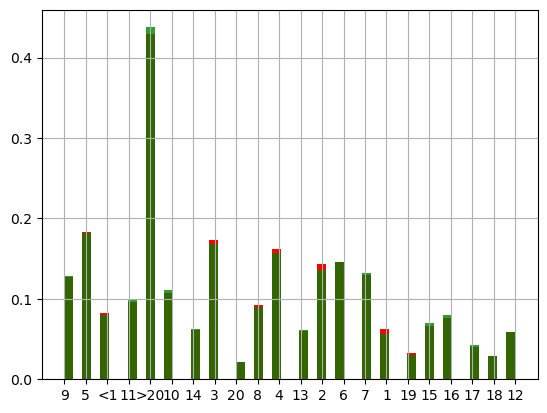

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['experience'].hist(bins=50, ax = ax, density = True , color = 'red')

# data after cca, the argument alpha makes the color transpaernt, so we can see the overly of the 2 distributions
new_df['experience'].hist(bins=50 , ax=ax, color='green', density=True, alpha=0.8)

In [39]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
],
                axis = 1)

# add column names
temp.columns = ['original' , 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


In [42]:
df = pd.read_csv('covid_toy.csv')

In [44]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [46]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [48]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.20 and df[var].isnull().mean() > 0]
cols

['fever']

In [54]:
df[cols].sample(5)

,fever
35,102.0
19,NaN
93,100.0
48,99.0
32,101.0


In [56]:
len(df[cols].dropna()) / len(df)

0.9

In [58]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

<Axes: >

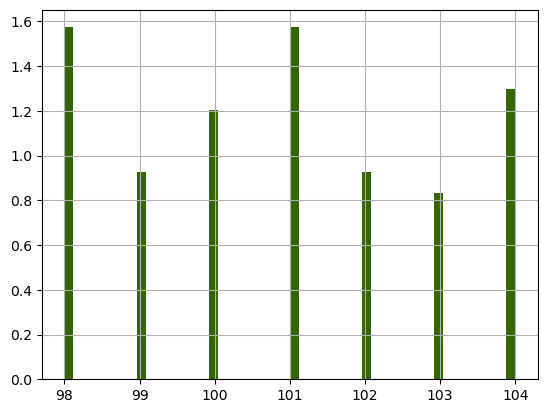

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['fever'].hist(bins=50, ax = ax, density = True , color = 'red')

# data after cca, the argument alpha makes the color transpaernt, so we can see the overly of the 2 distributions
new_df['fever'].hist(bins=50 , ax=ax, color='green', density=True, alpha=0.8)

In [70]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['fever'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['fever'].value_counts() / len(new_df)
],
                axis = 1)

# add column names
temp.columns = ['original' , 'cca']
temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000


In [80]:
df = pd.read_csv('titanic.csv')

In [84]:
# df.isnull().sum()

In [88]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [136]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.50 and df[var].isnull().mean() > 0]
cols

['Age', 'Fare']

In [138]:
df[cols].sample(5)

,Age,Fare
35,18.5,7.2292
114,63.0,221.7792
169,22.0,8.9625
416,NaN,8.0500
76,NaN,8.0500


In [140]:
len(df[cols].dropna()) / len(df)

0.7918660287081339

In [142]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((418, 12), (331, 2))

KeyError: 'age'

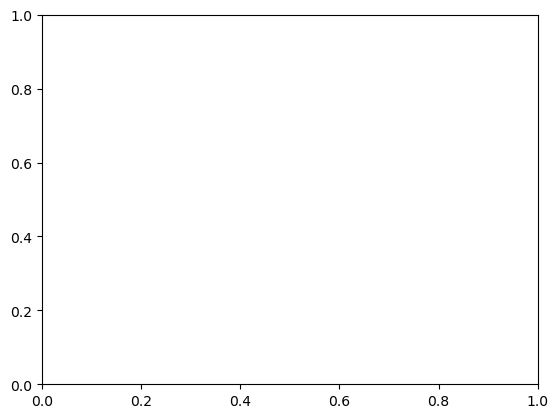

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['age'].hist(bins=50, ax = ax, density = True , color = 'red')

# data after cca, the argument alpha makes the color transpaernt, so we can see the overly of the 2 distributions
new_df['age'].hist(bins=50 , ax=ax, color='green', density=True, alpha=0.8)